# Requirements
#### If you have not performed the installations instruction in our `README.md`, you need to do so now. In order to run this Tutorial you need to have completed the following steps:

### 1.  Initial platform-independent (macOs, Windows, Linux) steps:
- clone this repo (probably you have done this, otherwise you wouldn't be in this notebook):
    ```bash
    git clone https://github.com/jan-forest/autoencodix.git
    ```
- change into the repo:
    ```bash
    cd autoencodix
    ```
###  2. platform-specific (maxOs, Windows) steps:
- Use the platform-specific Makefile (if you are not on Linux or WSL) with:
- **macOS**: Overwrite `Makefile` with `Makefile_macos`:
    ```bash
    cp Makefile_macos Makefile
    ```
- **Windows**: Overwrite `Makefile` with `Makefile_windows`:
    ```bash
    cp Makefile_windows Makefile
    ```

### 3. Remaining platform-independent steps:
- performed the installation instruction in the README.md. See following points for reference:

- Create environment with:
    ```bash
    make create_environment
    ```

- activate environment with:
    ```bash
    source venv-gallia/bin/activate
    ```

- install requirements with:
    ```bash
    make requirements
    ```

# Information:
#### You don't need to download any data or configuration files to run this Tutorial. The GitHub repository comes with the data for this `Getting-Started` Notebook.


# Getting Started
#### In this notebook we will get familiar with the Autoencodix Framework. We will learn a shared embedding of proteomics and image data with our `X-Modalix` model. Therefore we use a dataset that contains transcription factor (TF) expression measurements paired with fluorescence microscopy images from C. elegans embryonic development (Ma et al., 2021). In this tutorial, we'll implement a cross-modal autoencoder to translate between numerical TF expression profiles and their corresponding visual protein localization patterns in developing embryos.



### Execute the Python code below to see the workflow of this tutorial


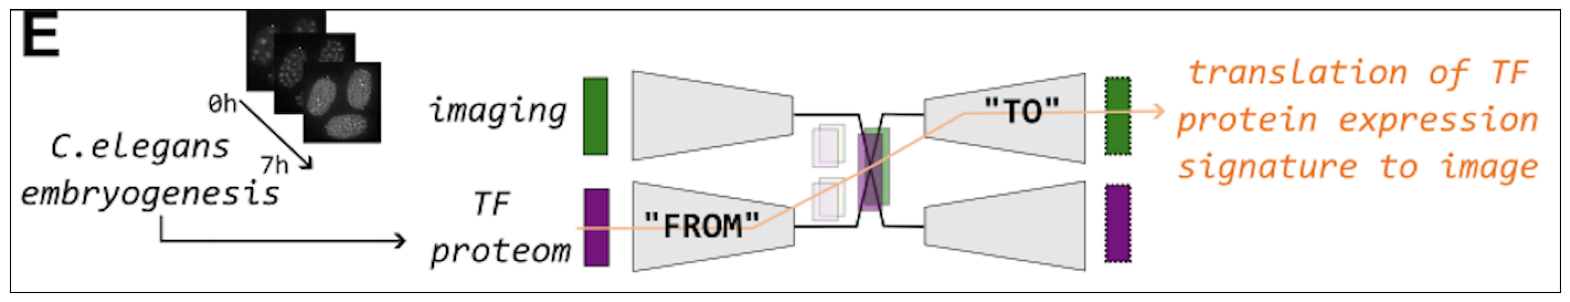

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
imgpath = os.path.join("TutorialData/xmodal.png")
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# Plan of action:
#### 1. Setup notebook & load datasets and config files
#### 2. Run our autoencodix pipeline
#### 3. Show how to customize the pipeline

# Start of Tutorial
## 1 Setup notebook & load data and config files
Firstly, we need to ensure we work in the correct directory. This is the root of our GitHub repo that you've cloned before.

When you changed nothing, you should be in the directory of the Tutorials now. This is great, we will change this to root of the autoencodix repository later, you don't have to do anything.


We use the following Python code to check the current working directory. If the output the following cell ends with `autoencodix/Tutorials`, you need to take **NO** action. Otherwise use `os.chdir(<path-to-autoencodix/Tutorials>)` to change to the correct working directory and execute the below cell again.
- Please execute the cell below

In [2]:
import os
cur_dir = os.getcwd()
print(f"Current working directory: {cur_dir}")
os.chdir("..")

Current working directory: /Users/maximilianjoas/development/autoencodix/Tutorials


## 2. Run our autoencodix pipeline
#### Here we will run four steps:
#### - `make data`
##### This will preprocess the data and create a train/valid/test split.
#### - `make model`
##### This will train our `X-Modalix` with the train dataset
#### - `make predict`
##### This will use the trained `X-Modalix` and generated embeddings and reconstructions on the test dataset
#### - `make visualize`
##### This create figures of the resulting latent space


**Information 1:**

Note that in the code below we use `make visualize`. Because `make data`, `make model` and `make prediction` are all required to run before visualization the `make visualize` command runs these steps internally.


## Important Note:
#### Depending on your hardware this step will take 5-10 minutes. If you do not want to wait, skip to section 3. Customize the pipeline, where we train for less epochs (which gives not as informative results).

In [3]:
! make visualize RUN_ID=getting_started

mkdir -p data/processed
mkdir -p data/raw
mkdir -p data/raw/images
mkdir -p reports
mkdir -p reports/figures
mkdir -p models
mkdir -p models/tuning/getting_started
mkdir -p data/interim/getting_started
mkdir -p data/processed/getting_started
mkdir -p models/getting_started
mkdir -p models/tuned/getting_started
mkdir -p reports/getting_started
mkdir -p reports/getting_started/figures
# check if run_id_config.yaml exists
# if not, copy config.yaml to run_id_config.yaml
# if yes copy the existing run_id_config.yaml to reports/getting_started/getting_started_config.yaml
if [ ! -f getting_started_config.yaml ]; then \
		sed -i '' '/RUN_ID/d' config.yaml; \
		echo "RUN_ID: getting_started" >> config.yaml; \
		cp config.yaml reports/getting_started/getting_started_config.yaml; \
	fi
if [ -f getting_started_config.yaml ]; then \
		sed -i '' '/RUN_ID/d' getting_started_config.yaml; \
		echo "RUN_ID: getting_started" >> getting_started_config.yaml; \
		cp getting_started_config.yaml reports/gett

#### Preparing the plots

In [4]:
import matplotlib.pyplot as plt
figure_base_path = os.path.join("reports/getting_started/figures")
translate_grid_path = os.path.join(figure_base_path, "translategrid_extra_class_labels.png")
latent_space_path = os.path.join(figure_base_path, "latent2D_Aligned_extra_class_labels.png")
translate_grid_img = cv2.imread(translate_grid_path)
translate_grid_img = cv2.cvtColor(translate_grid_img, cv2.COLOR_BGR2RGB)
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)

#### Plot 1: Translation Plot

##### Here we show reconstructions of the C. Elegans embryos. The columns of the grid indicate from which timepoint the images was generated. We binned the timepoints in to quartiles. The first two rows show a sampled point from the latentspace of the `FROM` modality (here proteomics) and the `TO` modality (here images). Please refer to our publication for more details. The three bottom rows of the grid show example translations from the test dataset for each quartile. 

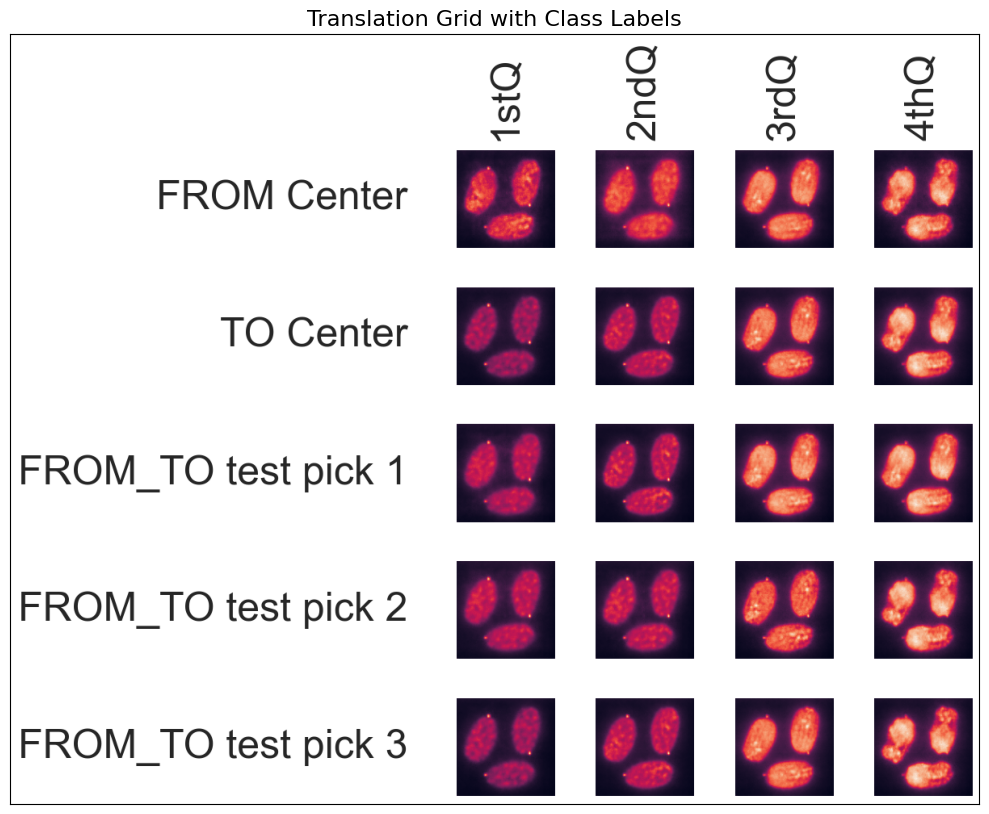

In [5]:
plt.figure(figsize=(15, 10))
translate_grid_img = cv2.imread(translate_grid_path)
translate_grid_img = cv2.cvtColor(translate_grid_img, cv2.COLOR_BGR2RGB)
plt.imshow(translate_grid_img)
plt.title('Translation Grid with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

#### Plot 2: 

##### Here we reduce the dimension of our latent space using a UMAP. We visualize the `FROM` (proteomics) latent space on the left and the `TO` (image data) latent space on the right. We color the datapoints according to the timepoint in embryogenesis. We see that the time information remains in the latent embedding.

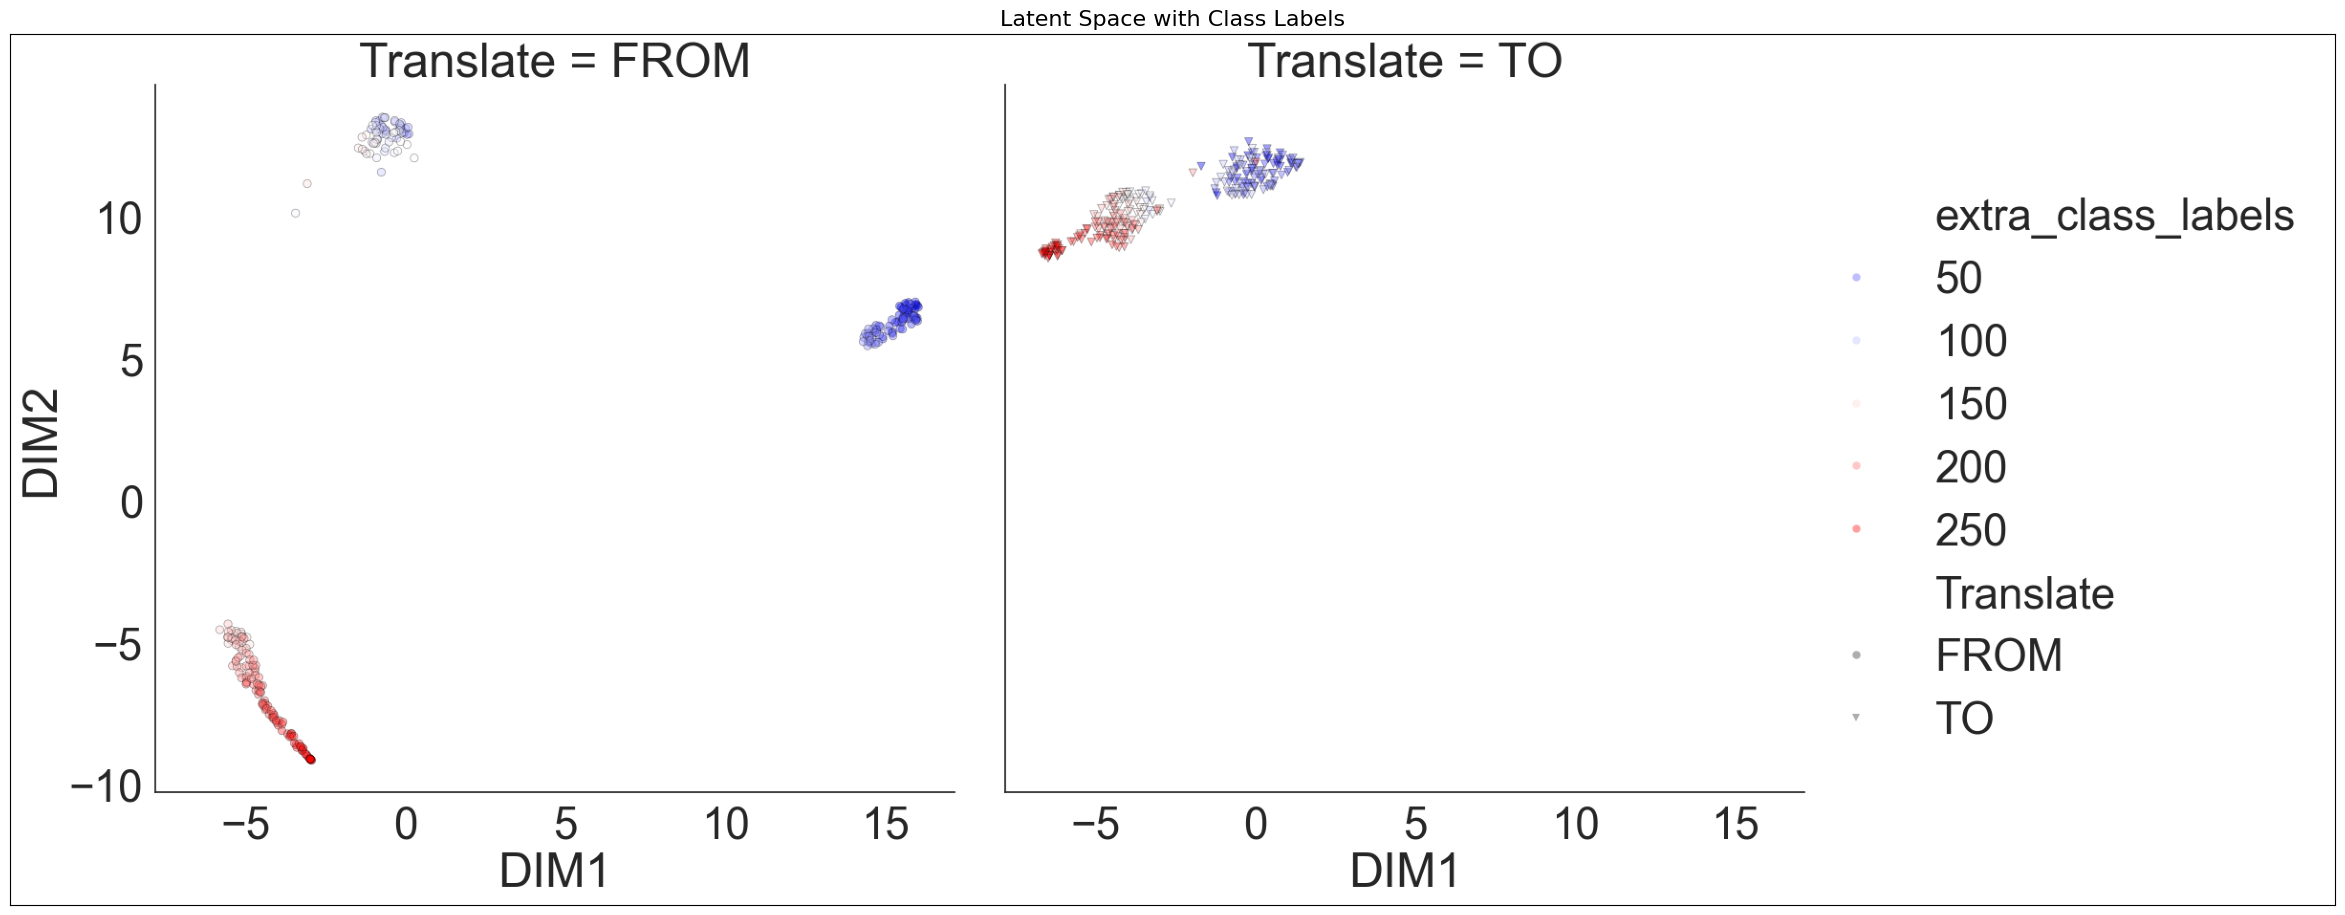

In [6]:
plt.figure(figsize=(30, 20))
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)
plt.imshow(latent_space_img)
plt.title('Latent Space with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## 3. How to customize the pipeline
##### This Tutorial should have given you an overview of the functionality of our `AUTOENCODIX`, without the hassle of downloading data or making customizations. However, for real-world use-cases you will likely need to make adjustments. This can be easily done by modifying the config file.

##### We have advanced Notebook Tutorials and extensive documentation that show how to build your own config with own data from scratch. Here, we want to show basic modifications. Let's say you want to:

##### - change number of epochs
##### - change pre-training epochs

##### We will overwrite these two parameters in the config and save the config under our new RUN_ID `my_getting_started`

In [7]:
import yaml

CFG_PATH = os.path.join("Tutorials/TutorialData/getting_started_config.yaml")
CFG = yaml.safe_load(open(CFG_PATH, "r"))
print(f"Configuration loaded from {CFG_PATH}")

MY_CFG = CFG.copy()
MY_CFG["EPOCHS"] = 15
MY_CFG["PRETRAIN_EPOCHS"] = 5
with open("my_getting_started_config.yaml", "w") as f:
    yaml.dump(MY_CFG, f)

Configuration loaded from Tutorials/TutorialData/getting_started_config.yaml


In [8]:
! make visualize RUN_ID=my_getting_started

mkdir -p data/processed
mkdir -p data/raw
mkdir -p data/raw/images
mkdir -p reports
mkdir -p reports/figures
mkdir -p models
mkdir -p models/tuning/my_getting_started
mkdir -p data/interim/my_getting_started
mkdir -p data/processed/my_getting_started
mkdir -p models/my_getting_started
mkdir -p models/tuned/my_getting_started
mkdir -p reports/my_getting_started
mkdir -p reports/my_getting_started/figures
# check if run_id_config.yaml exists
# if not, copy config.yaml to run_id_config.yaml
# if yes copy the existing run_id_config.yaml to reports/my_getting_started/my_getting_started_config.yaml
if [ ! -f my_getting_started_config.yaml ]; then \
		sed -i '' '/RUN_ID/d' config.yaml; \
		echo "RUN_ID: my_getting_started" >> config.yaml; \
		cp config.yaml reports/my_getting_started/my_getting_started_config.yaml; \
	fi
if [ -f my_getting_started_config.yaml ]; then \
		sed -i '' '/RUN_ID/d' my_getting_started_config.yaml; \
		echo "RUN_ID: my_getting_started" >> my_getting_started_config.ya

#### Investigation custom results


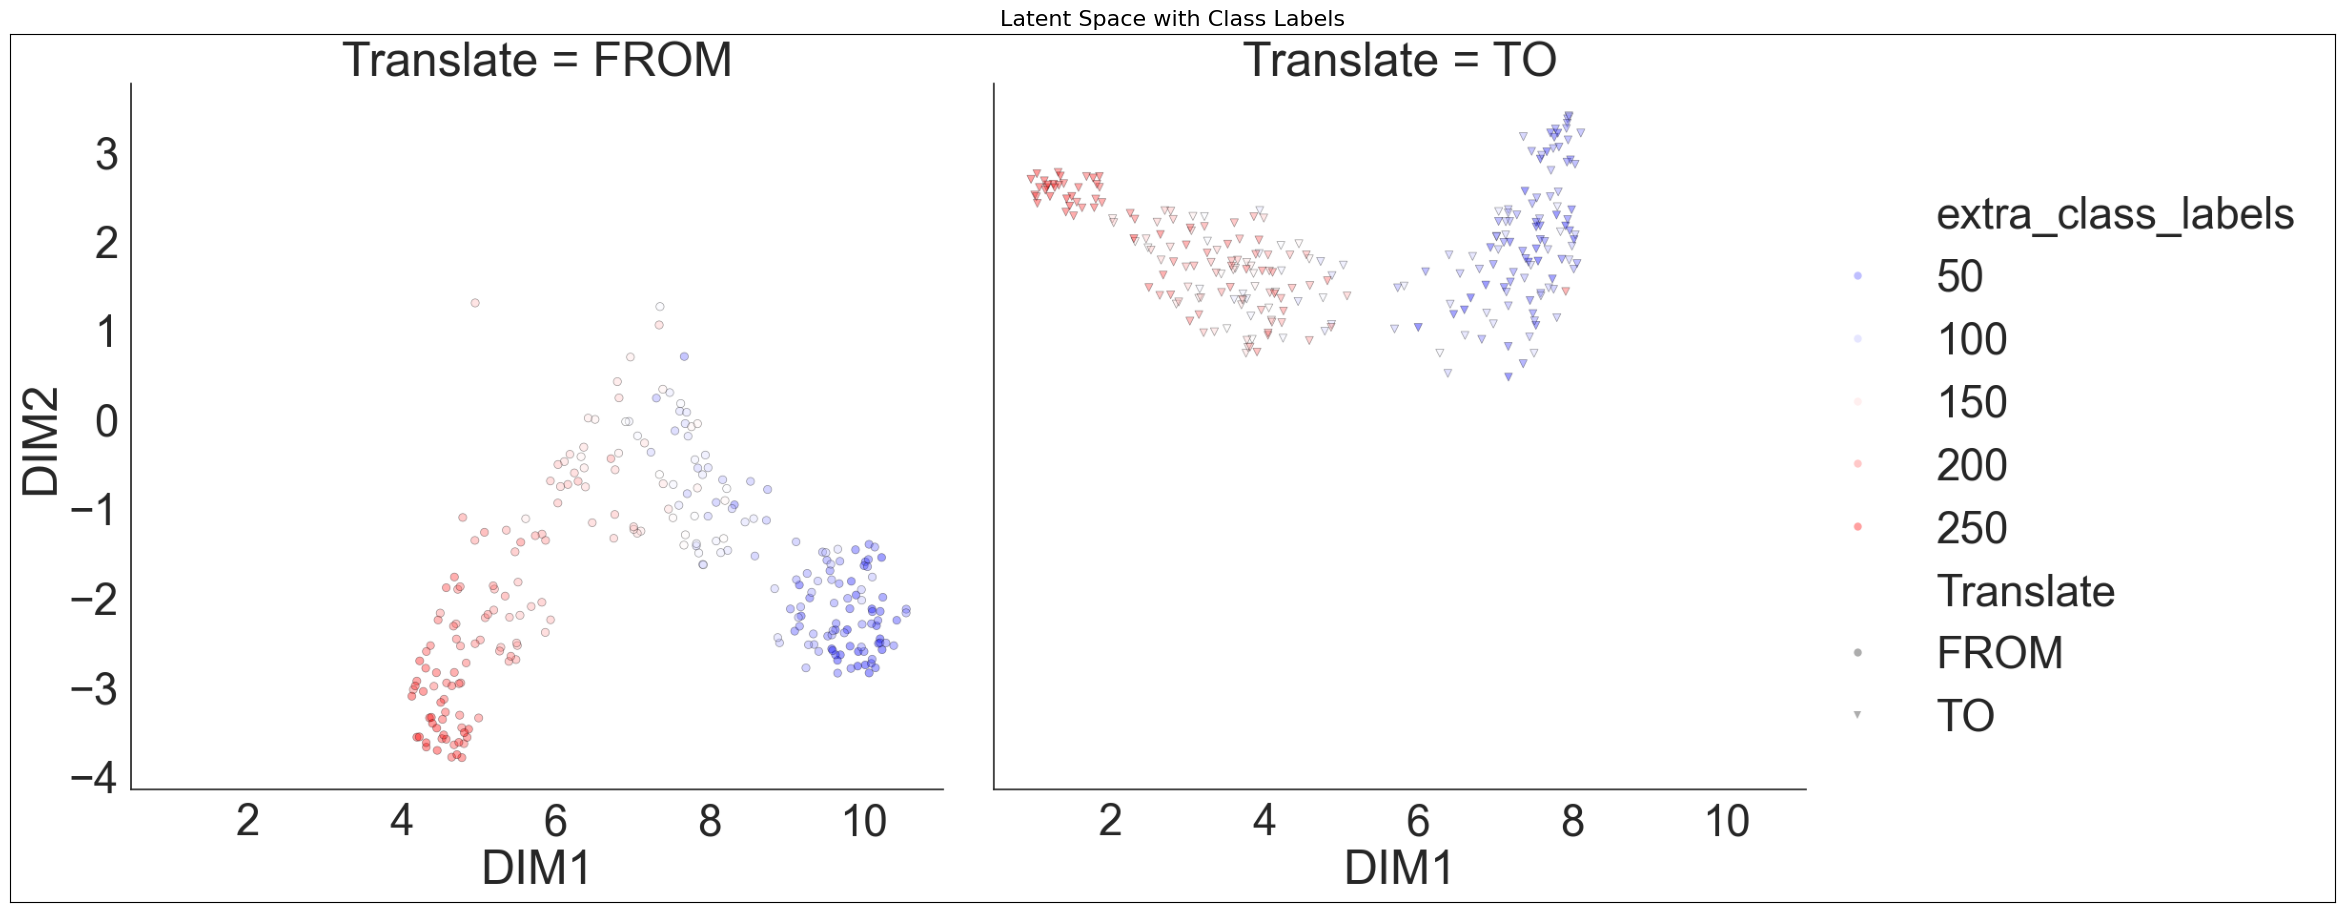

In [9]:
figure_base_path = os.path.join("reports/my_getting_started/figures")
latent_space_path = os.path.join(figure_base_path, "latent2D_Aligned_extra_class_labels.png")
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 20))
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)
plt.imshow(latent_space_img)
plt.title('Latent Space with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## Next Steps
Here we showed the basic function of Autoencodix. If you want to learn how to use Autoencodix with your data, or get more technical information, you might consider the following Tutorials:
#### - How to train a explainable autoencoder with your ontologies: `Advanced_Ontix.ipynb`
#### - How to use Autoencodix for Single Cell Data: `Basics_single-cell.ipynb`
#### - Get more information about the each step in the pipeline and cross modale auteoncoders: `Advanced_Xmodalix.ipynb`, (`Basics_Xmodalix.ipynb`)

## References
```
Citation: Ma, X., Zhao, Z., Xiao, L. et al. A 4D single-cell protein atlas of transcription factors delineates spatiotemporal patterning during embryogenesis. Nat Methods 18, 893–902 (2021). https://doi.org/10.1038/s41592-021-01216-1
```

In [10]:
import tifffile
import numpy as np
from pathlib import Path
import cv2
import os

def resize_tiff_images(input_dir, output_dir=None, target_size=(64, 64)):
    """
    Read all TIFF images in a directory and resize them from 128x128 to 64x64
    
    Parameters:
    input_dir (str): Path to directory containing TIFF images
    output_dir (str): Path to output directory (optional, defaults to input_dir + '_resized')
    target_size (tuple): Target size as (height, width)
    """
    
    input_path = Path(input_dir)
    
    # Create output directory if not specified
    if output_dir is None:
        output_path = input_path.parent / (input_path.name + '_resized')
    else:
        output_path = Path(output_dir)
    
    output_path.mkdir(exist_ok=True)
    
    # Find all TIFF files in the directory
    tiff_files = list(input_path.glob('*.tif')) + list(input_path.glob('*.tiff'))
    
    if not tiff_files:
        print(f"No TIFF files found in {input_dir}")
        return
    
    print(f"Found {len(tiff_files)} TIFF files")
    
    for tiff_file in tiff_files:
        try:
            print(f"Processing: {tiff_file.name}")
            
            # Read the TIFF file
            image = tifffile.imread(tiff_file)
            
            print(f"Original shape: {image.shape}")
            
            # Handle different image dimensions
            if len(image.shape) == 2:
                # Single 2D image (grayscale)
                resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                
            elif len(image.shape) == 3:
                # Multiple 2D images or single RGB image
                if image.shape[2] <= 4:  # Likely RGB/RGBA (channels last)
                    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                else:  # Likely stack of 2D images (channels first or stack)
                    resized_images = []
                    for i in range(image.shape[0]):
                        resized_slice = cv2.resize(image[i], target_size, interpolation=cv2.INTER_AREA)
                        resized_images.append(resized_slice)
                    resized_image = np.stack(resized_images, axis=0)
                
            elif len(image.shape) == 4:
                # 4D stack (e.g., time series of RGB images)
                resized_images = []
                for i in range(image.shape[0]):
                    resized_slice = cv2.resize(image[i], target_size, interpolation=cv2.INTER_AREA)
                    resized_images.append(resized_slice)
                resized_image = np.stack(resized_images, axis=0)
            
            else:
                print(f"Unsupported image shape: {image.shape}")
                continue
            
            print(f"Resized shape: {resized_image.shape}")
            
            # Save the resized image
            output_file = output_path / tiff_file.name
            tifffile.imwrite(output_file, resized_image)
            
            print(f"Saved: {output_file}")
            
        except Exception as e:
            print(f"Error processing {tiff_file.name}: {str(e)}")
            continue
    
    print(f"\nProcessing complete! Resized images saved to: {output_path}")

# Example usage
if __name__ == "__main__":
    # Specify your directory path
    input_directory = "Tutorials/TutorialData/images/ALY-2_SYS721/"
    # Optional: specify output directory
    # output_directory = "data/processed/getting_started_64x64"
    
    # Resize images
    resize_tiff_images(input_directory)
    
    # Alternative: resize specific file
    # specific_file = "data/processed/getting_started/ALY-2_SYS721_t101.tif"
    # if os.path.exists(specific_file):
    #     image = tifffile.imread(specific_file)
    #     resized = resize(image, (64, 64), anti_aliasing=True, preserve_range=True)
    #     resized = resized.astype(image.dtype)
    #     tifffile.imwrite("ALY-2_SYS721_t101_resized.tif", resized)

Found 260 TIFF files
Processing: ALY-2_SYS721_t32.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721_resized/ALY-2_SYS721_t32.tif
Processing: ALY-2_SYS721_t114.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721_resized/ALY-2_SYS721_t114.tif
Processing: ALY-2_SYS721_t100.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721_resized/ALY-2_SYS721_t100.tif
Processing: ALY-2_SYS721_t26.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721_resized/ALY-2_SYS721_t26.tif
Processing: ALY-2_SYS721_t128.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721_resized/ALY-2_SYS721_t128.tif
Processing: ALY-2_SYS721_t129.tif
Original shape: (64, 64, 3)
Resized shape: (64, 64, 3)
Saved: Tutorials/TutorialData/images/ALY-2_SYS721